In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline,Pipeline


In [4]:
#Reading dataset 

df=pd.read_csv('train.csv')

In [5]:
#First five rows

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#Random five rows

df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
525,526,0,3,"Farrell, Mr. James",male,40.5,0,0,367232,7.7500,NaN,Q
448,449,1,3,"Baclini, Miss. Marie Catherine",female,5.0,2,1,2666,19.2583,NaN,C
64,65,0,1,"Stewart, Mr. Albert A",male,NaN,0,0,PC 17605,27.7208,NaN,C
424,425,0,3,"Rosblom, Mr. Viktor Richard",male,18.0,1,1,370129,20.2125,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.5500,NaN,S


In [7]:
#Getting info about dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
#Description of dataset

df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
#Cheking for null values

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

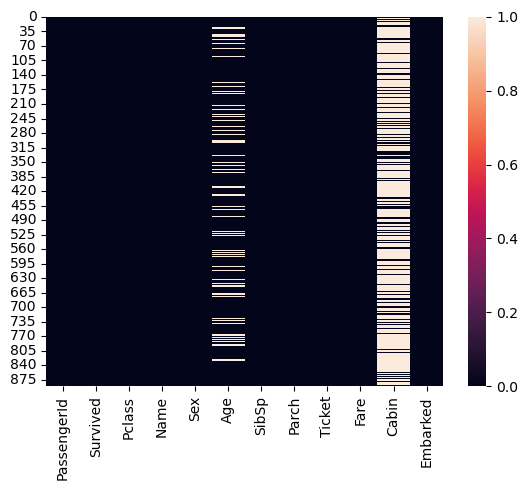

In [10]:
sns.heatmap(df.isnull())

# Univariate analysis

<AxesSubplot:xlabel='PassengerId', ylabel='Density'>

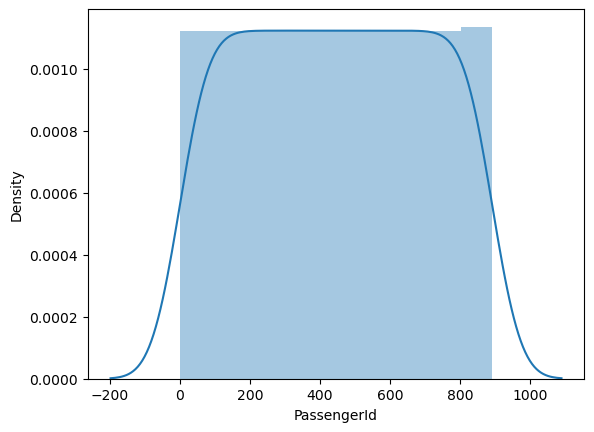

In [11]:
#Cheking distribution of passenger id
sns.distplot(df['PassengerId'])

<AxesSubplot:xlabel='Age', ylabel='Density'>

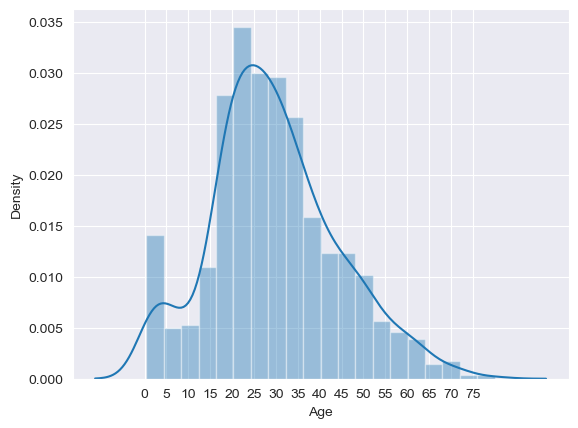

In [12]:
#Checking distribution of age

sns.set_style('darkgrid')
plt.xticks(np.arange(0,80,step=5))
sns.distplot(df['Age'])

Findings:
    1:The data is normally distributed
    2:the maximum data of age is between age 20 to age 35

<AxesSubplot:xlabel='Fare', ylabel='Density'>

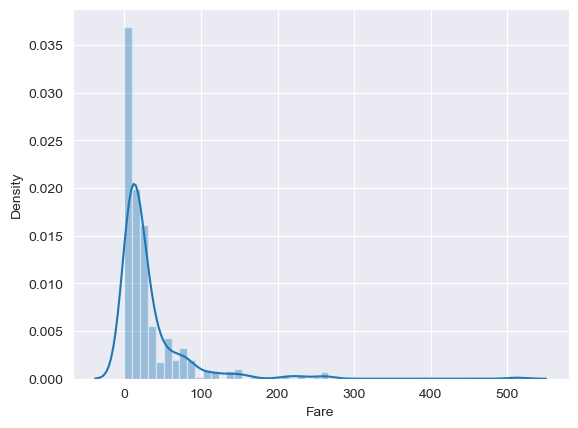

In [13]:
#Checking distribution of fare
sns.distplot(df['Fare'])

<AxesSubplot:xlabel='Survived', ylabel='count'>

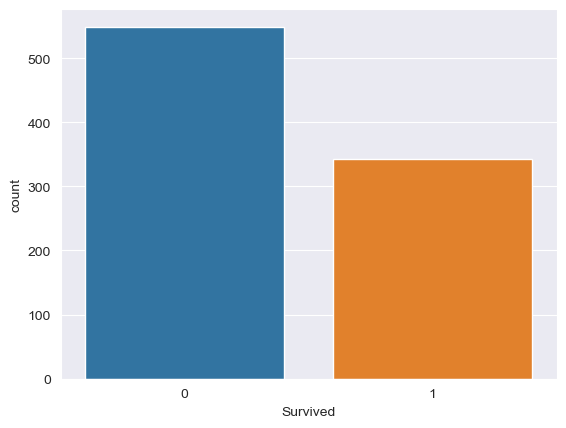

In [14]:
sns.countplot(df['Survived'])

In [15]:
(df['Survived'].value_counts()/len(df))*100

0    61.616162
1    38.383838
Name: Survived, dtype: float64

Findings:
    
    1:people died most as compared to survived

# Bivariate analysis

<AxesSubplot:xlabel='Survived', ylabel='Age'>

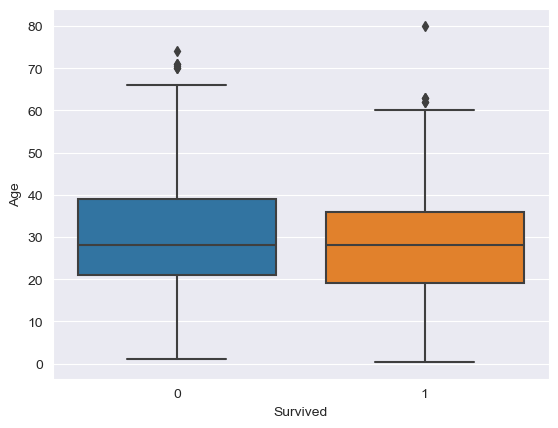

In [16]:
#Checking for outliers

sns.boxplot(x=df['Survived'],y=df['Age'])

Findings:
    1:Age has outliers in it so we have to remove it

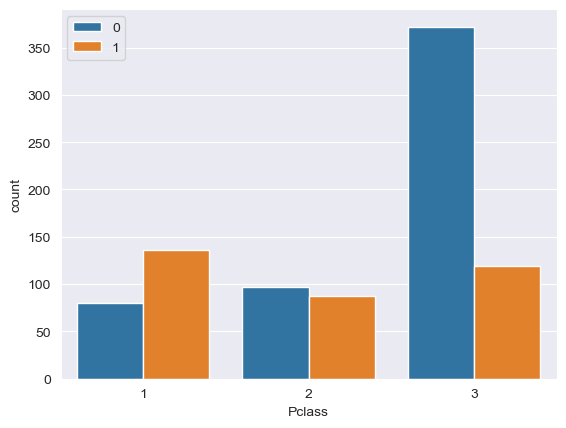

In [17]:
#Cheking for people who survived most in which class
sns.countplot(x=df['Pclass'],hue=df['Survived'])
plt.legend(loc='upper left')

Findings

    1:People those in first class are survived most
    
    2:People those in third class died most

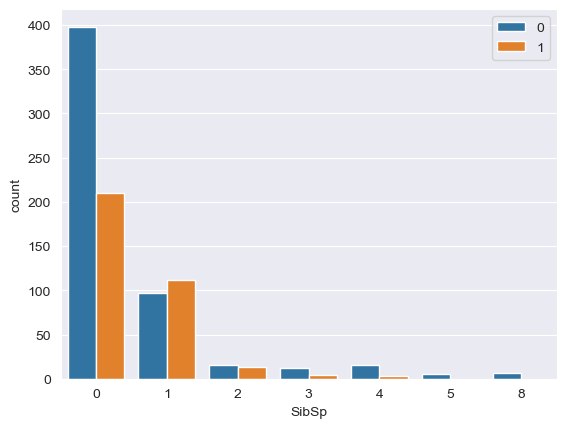

In [18]:
#Cheking count of who survived with siblings or spouse

sns.countplot(x=df['SibSp'],hue=df['Survived'])
plt.legend(loc='upper right')

Findings:

    1:Those who are single has survived most followed by who has one sibling 

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

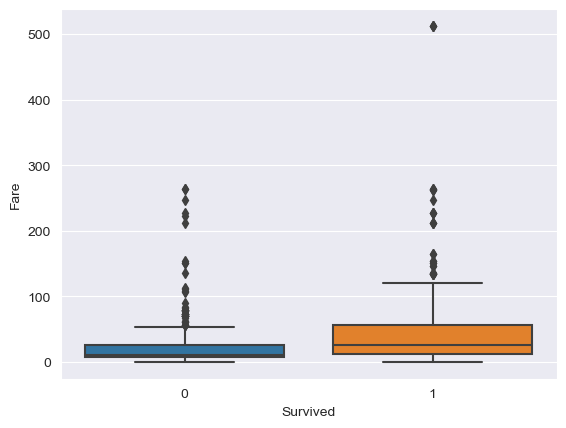

In [19]:
#Checking for outliers in survived and Fare column
sns.boxplot(x=df['Survived'],y=df['Fare'])

Findings:

1:Both contains outliers in it

# Multivariate Analysis

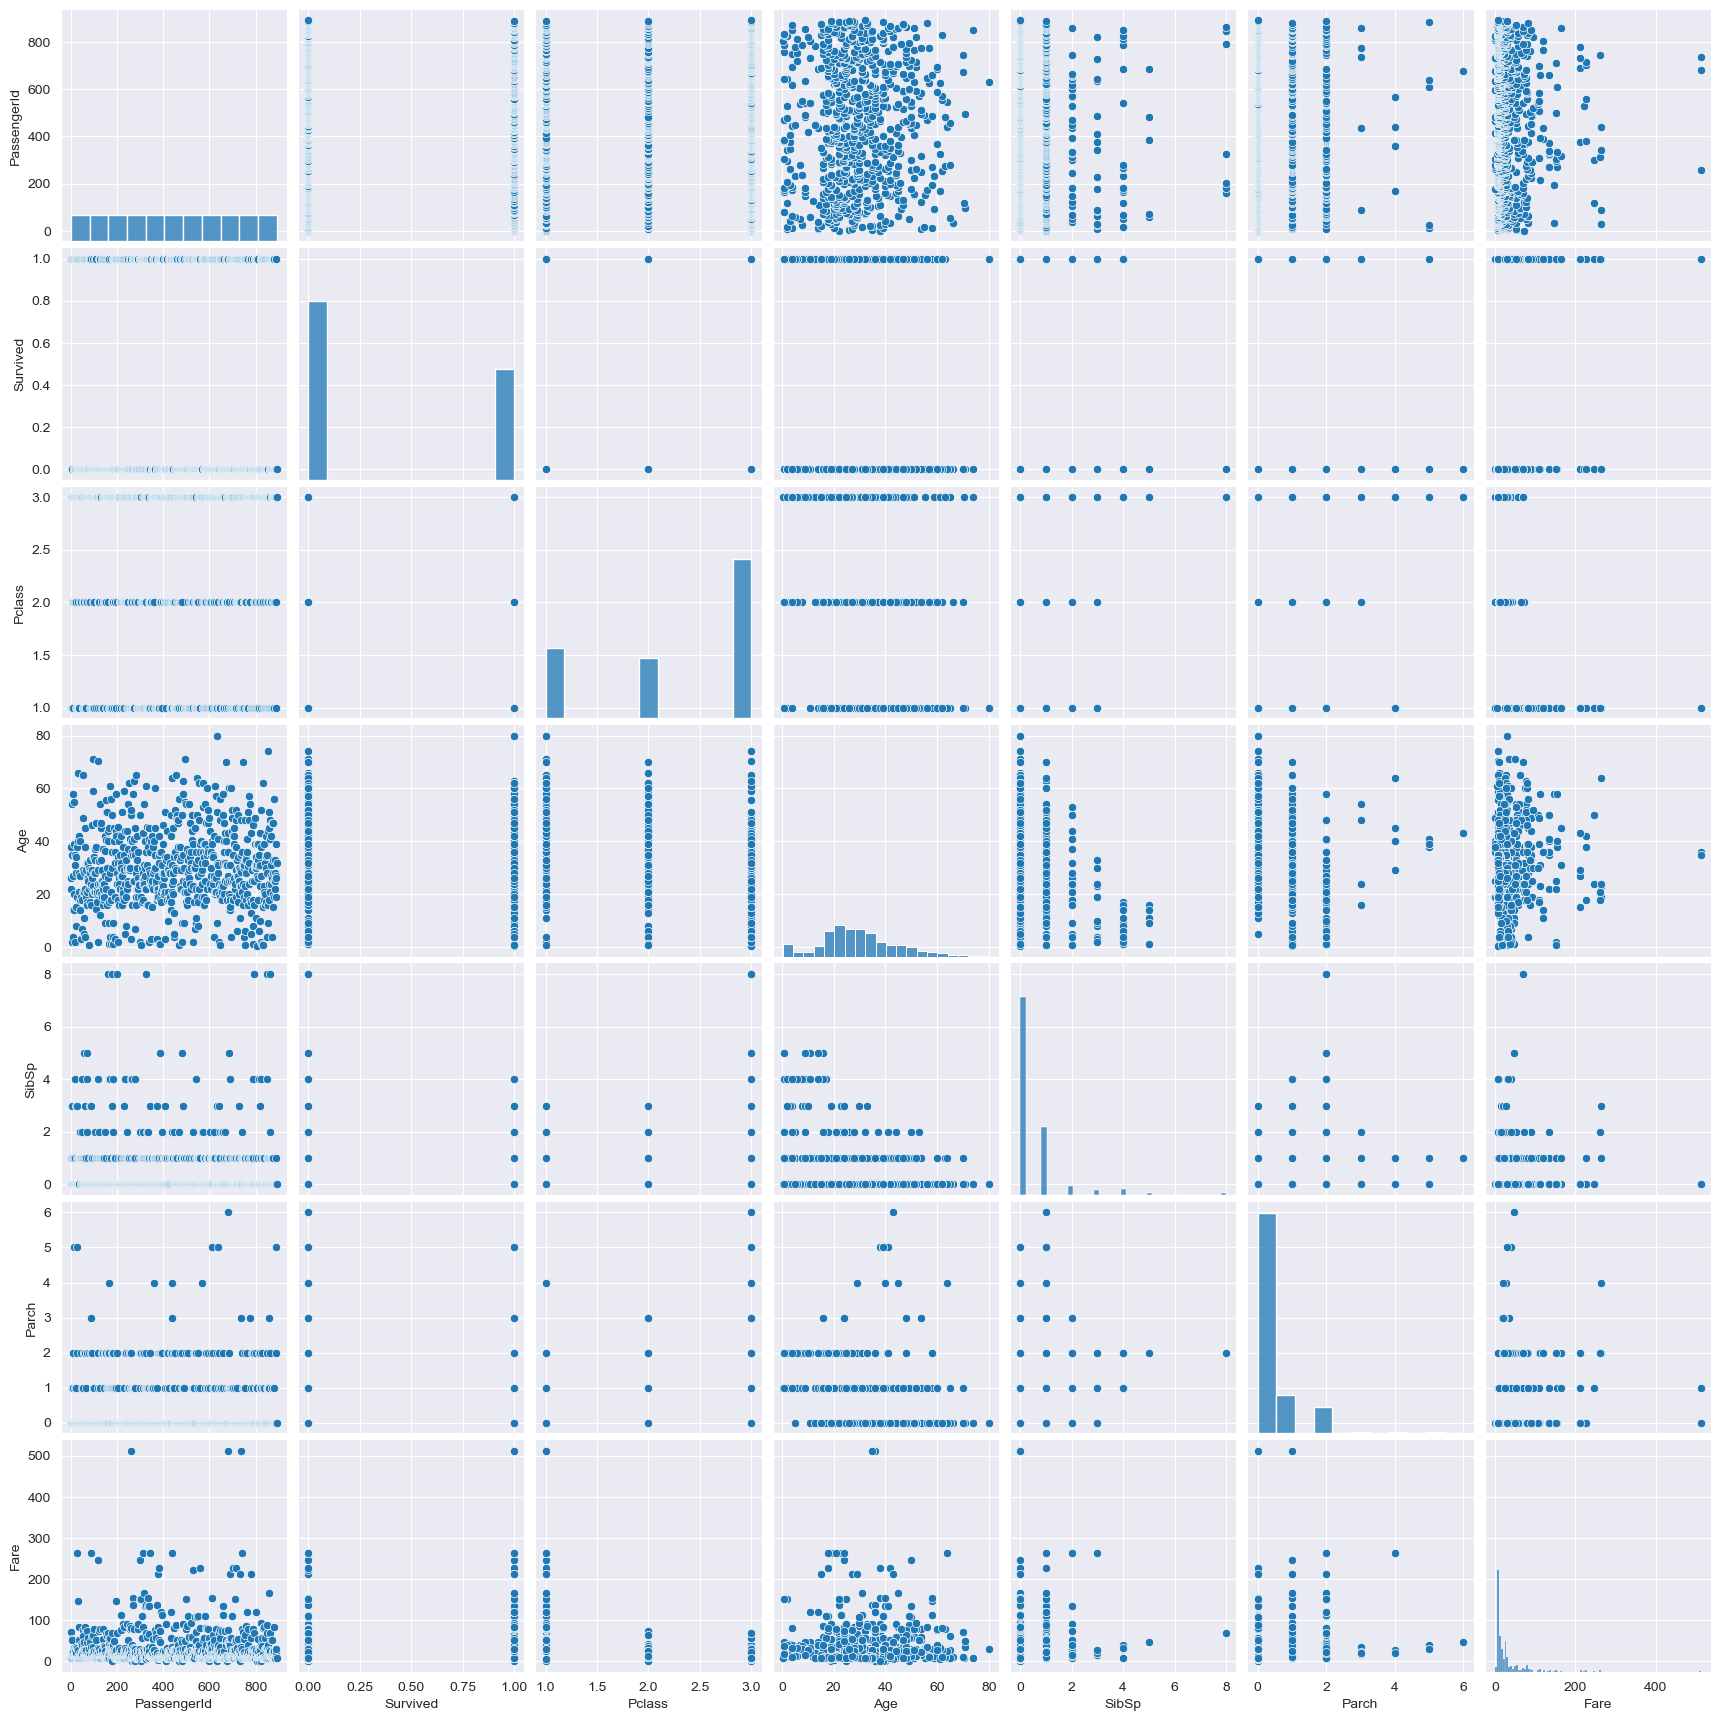

In [20]:
sns.pairplot(data=df)

<AxesSubplot:>

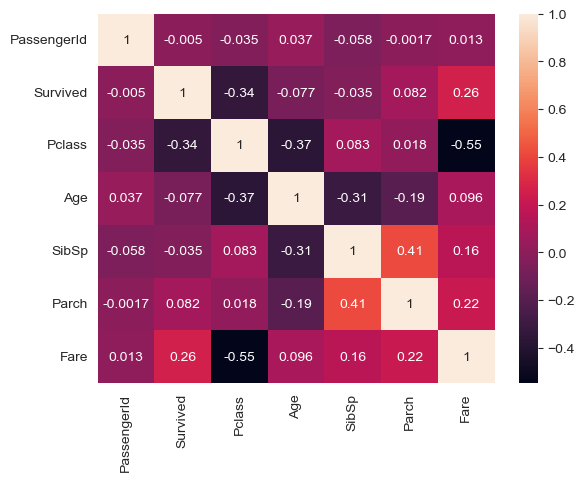

In [21]:
sns.heatmap(df.corr(),annot=True)

In [22]:
df.drop(['Name','Ticket','Cabin','PassengerId'],axis=1,inplace=True)

In [23]:
X=df.drop('Survived',axis=1)
y=df.Survived

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [25]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
520,1,female,30.0,0,0,93.5000,S
510,3,male,29.0,0,0,7.7500,Q
446,2,female,13.0,0,1,19.5000,S
2,3,female,26.0,0,0,7.9250,S
691,3,female,4.0,0,1,13.4167,C
...,...,...,...,...,...,...,...
575,3,male,19.0,0,0,14.5000,S
838,3,male,32.0,0,0,56.4958,S
337,1,female,41.0,0,0,134.5000,C
523,1,female,44.0,0,1,57.9792,C


In [26]:
y_train.sample(5)

710    1
526    1
20     0
255    1
584    0
Name: Survived, dtype: int64

In [27]:
trf1=ColumnTransformer(
[('impute_age',SimpleImputer(),[2]),
('impute_embarked',SimpleImputer(strategy='most_frequent'),[6])],
remainder='passthrough')

In [28]:
trf2=ColumnTransformer(
[('ohe_sex_embarked',OneHotEncoder(sparse=False,handle_unknown='ignore'),[1,6])],remainder='passthrough')

In [29]:
trf3=ColumnTransformer(
[('scale',MinMaxScaler(),slice(0,8))])

In [30]:
trf5=DecisionTreeClassifier()

In [31]:
pipe=Pipeline([
('trf1',trf1),
('trf2',trf2),
('trf3',trf3),
('trf5',trf5)])

In [32]:
pipe=make_pipeline(trf1,trf2,trf3,trf5)

In [33]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer-1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_age', SimpleImputer(),
                                                  [2]),
                                                 ('impute_embarked',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [6])])),
                ('columntransformer-2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_sex_embarked',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [1, 6])])),
                ('columntransformer-3',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 8, None))])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [34]:
from sklearn import  set_config
set_config(display='diagram')

In [35]:
y_pred=pipe.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
accuracy_score(y_test,y_pred)

0.6119402985074627

In [38]:
pipe.classes_

array([0, 1], dtype=int64)

In [39]:
pipe.feature_names_in_

array(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'],
      dtype=object)

In [40]:
pipe.get_feature_names_out


<bound method Pipeline.get_feature_names_out of Pipeline(steps=[('columntransformer-1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_age', SimpleImputer(),
                                                  [2]),
                                                 ('impute_embarked',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [6])])),
                ('columntransformer-2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_sex_embarked',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [1, 6])])),
                ('columntransformer-3',
                 ColumnTransformer(transformers=[('scale

In [41]:
pipe.steps

[('columntransformer-1',
  ColumnTransformer(remainder='passthrough',
                    transformers=[('impute_age', SimpleImputer(), [2]),
                                  ('impute_embarked',
                                   SimpleImputer(strategy='most_frequent'),
                                   [6])])),
 ('columntransformer-2',
  ColumnTransformer(remainder='passthrough',
                    transformers=[('ohe_sex_embarked',
                                   OneHotEncoder(handle_unknown='ignore',
                                                 sparse=False),
                                   [1, 6])])),
 ('columntransformer-3',
  ColumnTransformer(transformers=[('scale', MinMaxScaler(), slice(0, 8, None))])),
 ('decisiontreeclassifier', DecisionTreeClassifier())]

In [42]:
pipe.named_steps

{'columntransformer-1': ColumnTransformer(remainder='passthrough',
                   transformers=[('impute_age', SimpleImputer(), [2]),
                                 ('impute_embarked',
                                  SimpleImputer(strategy='most_frequent'),
                                  [6])]),
 'columntransformer-2': ColumnTransformer(remainder='passthrough',
                   transformers=[('ohe_sex_embarked',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse=False),
                                  [1, 6])]),
 'columntransformer-3': ColumnTransformer(transformers=[('scale', MinMaxScaler(), slice(0, 8, None))]),
 'decisiontreeclassifier': DecisionTreeClassifier()}